## Notebook de Analisis y Limpieza de Datos
Este notebook tiene como objetivo limpiar y preprocesar un conjunto de datos meteorológicos que incluye columnas numéricas y categóricas. 

Se aplicarán varios pasos de limpieza, como el manejo de valores nulos, la interpolación de valores faltantes, la detección de outliers, y la conversión de tipos de datos. 

Finalmente, se exportará el conjunto de datos limpio y listo el modelado de machine learning.


### 1. **Carga del dataset**

In [73]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el dataset procesado
df = pd.read_csv('../data/processed/datos_procesados.csv')

# Verificar las primeras filas del dataset y los tipos de datos
df.head(3), df.dtypes

(    Año Mes Día Temp Media Temp Máxima Hora Temp Max Minuto Temp Max  \
 0  2016   1   1       10.3        11.2            20              40   
 1  2016   1   2       11.8        18.1            19              30   
 2  2016   1   3       11.3        16.4            15               0   
 
   Temp Mínima Hora Temp Min Minuto Temp Min  ... Hora Viento Minuto Viento  \
 0         9.2             1              30  ...           6            55   
 1         8.6             0              55  ...          15            20   
 2         5.6             5              40  ...          10            35   
 
   Presión Media Lluvia Diaria Radiación Máxima Hora Radiación Máxima  \
 0        1004.6           0.0            256.0                    12   
 1         996.2           0.2            798.0                    13   
 2        1004.3           0.0           1186.0                    15   
 
   Minuto Radiación Mínima UV Máximo Hora UV Máximo Minuto UV Máximo  
 0                     

### **2. Verificar si hay Valores Faltantes**
   
>Verificamos si hay valores faltantes en las columnas del dataset.

In [74]:
# Verificar si hay valores faltantes
df.isnull().sum()

Año                          0
Mes                         56
Día                         57
Temp Media                  57
Temp Máxima                 63
Hora Temp Max              231
Minuto Temp Max            231
Temp Mínima                231
Hora Temp Min              343
Minuto Temp Min            658
Viento Medio               658
Dirección Viento           868
Ráfaga de Viento           868
Dirección de Ráfaga        868
Hora Viento                926
Minuto Viento              926
Presión Media              982
Lluvia Diaria              982
Radiación Máxima           982
Hora Radiación Máxima      986
Minuto Radiación Mínima    986
UV Máximo                  986
Hora UV Máximo             986
Minuto UV Máximo           986
dtype: int64

>Se ha encontrado cantidad de valores faltantes en la mayoria de los valores que posteriormente se procederá a realizar las conversiones necesarias.

### **3. Definir Columnas por Tipo de Dato**
>Definimos las columnas por tipo de dato (entero, flotante, y categórico) para realizar las conversiones necesarias.

In [75]:
# Listas de columnas por tipo de dato requerido
columnas_int = [
    'Año', 'Mes', 'Día', 'Hora Temp Max', 'Minuto Temp Max', 
    'Hora Temp Min', 'Minuto Temp Min', 'Hora Viento', 'Minuto Viento', 
    'Hora Radiación Máxima', 'Minuto Radiación Mínima', 'Hora UV Máximo', 'Minuto UV Máximo'
]

columnas_float = [
    'Temp Media', 'Temp Máxima', 'Temp Mínima', 'Viento Medio', 'Ráfaga de Viento', 
    'Presión Media', 'Lluvia Diaria', 'Radiación Máxima', 'UV Máximo'
]

columnas_categorical = ['Dirección Viento', 'Dirección de Ráfaga']



### **4. Convertir Columnas a Tipos Numéricos**
>Convertimos las columnas de tipo flotante y entero a su tipo correspondiente, forzando a NaN aquellos valores no convertibles.

In [76]:
# Convertir las columnas a float, forzando valores no convertibles a NaN
for col in columnas_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir las columnas a int, forzando valores no convertibles a NaN y redondeando si es necesario
for col in columnas_int:
    df[col] = pd.to_numeric(df[col], errors='coerce').round()


### **5. Rellenar Valores Nulos con Interpolación**
>Llenamos los valores nulos en las columnas numéricas mediante interpolación lineal.

In [77]:
# Rellenar valores numéricos nulos mediante interpolación
df[columnas_float + columnas_int] = df[columnas_float + columnas_int].interpolate(method='linear')

# Convertir las columnas a Int64 después de la interpolación y el redondeo
for col in columnas_int:
    df[col] = df[col].round().astype('Int64')
    
# Rellenar valores nulos restantes en columnas categóricas (ejemplo con moda)
df['Dirección Viento'] = df['Dirección Viento'].fillna(df['Dirección Viento'].mode()[0])
df['Dirección de Ráfaga'] = df['Dirección de Ráfaga'].fillna(df['Dirección de Ráfaga'].mode()[0])

### **6. Convertir Columnas Categóricas**
>Convertimos las columnas categóricas a tipo category. Respetando las consignas del entregable del dataset.

In [78]:
for col in columnas_categorical:
    df[col] = df[col].astype('category')

### **7. Rellenar Valores Nulos en Columnas Categóricas con la Moda**
>Rellenamos los valores nulos en las columnas categóricas utilizando la moda de cada columna.

In [79]:
for col in columnas_categorical:
    df[col] = df[col].fillna(df[col].mode()[0])

# Mostramos los valores nuevamente
df.describe()

,Año,Mes,Día,Temp Media,Temp Máxima,Hora Temp Max,Minuto Temp Max,Temp Mínima,Hora Temp Min,Minuto Temp Min,...,Hora Viento,Minuto Viento,Presión Media,Lluvia Diaria,Radiación Máxima,Hora Radiación Máxima,Minuto Radiación Mínima,UV Máximo,Hora UV Máximo,Minuto UV Máximo
count,4229.0,4229.0,4229.0,4229.000000,4229.000000,4229.0,4229.0,4229.000000,4229.0,4229.0,...,4229.0,4229.0,4229.000000,4229.000000,4229.000000,4229.0,4229.0,4229.000000,4229.0,4229.0
mean,1752.841807,2.022937,16.282809,7.291842,10.762982,23.6751,27.018208,136.787432,153.275242,135.769449,...,12.531095,27.085599,1001.366990,0.756042,588.928707,13.011114,26.688815,2.558383,10.266493,22.570111
std,544.781293,15.669321,10.859468,5.439235,5.530794,20.177169,15.86355,272.503416,425.700991,243.865047,...,5.780868,16.482618,10.741144,1.807036,337.416538,1.224405,15.973669,2.325532,5.158387,17.665212
min,-3.0,-67.0,-15.0,-11.900000,-8.800000,0.0,0.0,-14.900000,0.0,0.0,...,0.0,0.0,956.500000,0.000000,14.000000,8.0,0.0,0.000000,0.0,0.0
25%,2016.0,2.0,8.0,3.700000,6.500000,14.0,15.0,-0.200000,4.0,15.0,...,10.0,15.0,994.100000,0.000000,272.000000,12.0,15.0,0.550000,12.0,5.0
50%,2019.0,6.0,16.0,7.100000,10.900000,15.0,26.0,3.200000,8.0,40.0,...,14.0,27.0,1001.040000,0.000000,566.000000,13.0,25.0,1.800000,13.0,20.0
75%,2021.0,10.0,24.0,10.500000,15.100000,21.0,40.0,10.300000,23.0,55.0,...,16.0,40.0,1009.000000,0.500000,889.000000,14.0,40.0,4.500000,13.0,38.0
max,2024.0,31.0,47.0,31.300000,30.700000,138.0,55.0,1019.400000,2024.0,1376.0,...,24.0,55.0,1035.500000,21.200000,1376.000000,19.0,55.0,10.900000,16.0,55.0


### **8. Filtrar el Dataset por Año**
>Filtramos las filas donde la columna 'Año' esté entre 2016 y 2024, inclusive. Eliminamos valores negativos en las fechas ya que se ha observado dichos valores en la tabla.

In [80]:
df = df[df['Año'].between(2016, 2024)]

# Eliminar filas donde 'Mes' o 'Día' tienen valores negativos
df = df[(df['Mes'] >= 0) & (df['Día'] >= 0)]


### **9. Detectar y Corregir Outliers**
>Usamos el método del rango intercuartílico (IQR) para detectar y corregir los outliers en las columnas numéricas.

In [81]:
# Función para detectar outliers usando el IQR
def detect_outliers(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Definir los límites superior e inferior para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Reemplazar los outliers por los valores dentro del rango permitido
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Listado de columnas a revisar (en este caso numéricas)
columnas_a_verificar = [
    'Temp Media', 'Temp Máxima', 'Temp Mínima', 'Viento Medio', 'Ráfaga de Viento', 
    'Presión Media', 'Lluvia Diaria', 'Radiación Máxima', 'UV Máximo'
]

# Llamamos a la función para detectar y corregir outliers
df = detect_outliers(df, columnas_a_verificar)



In [82]:
# Verificar valores nulos nuevamente
df.isnull().sum()


Año                        0
Mes                        0
Día                        0
Temp Media                 0
Temp Máxima                0
Hora Temp Max              0
Minuto Temp Max            0
Temp Mínima                0
Hora Temp Min              0
Minuto Temp Min            0
Viento Medio               0
Dirección Viento           0
Ráfaga de Viento           0
Dirección de Ráfaga        0
Hora Viento                0
Minuto Viento              0
Presión Media              0
Lluvia Diaria              0
Radiación Máxima           0
Hora Radiación Máxima      0
Minuto Radiación Mínima    0
UV Máximo                  0
Hora UV Máximo             0
Minuto UV Máximo           0
dtype: int64

>Los valores ya estan limpios de nulos.

### **10. Visualizacion de los datos**
#### **Matriz de Correlación**
>La matriz de correlación nos muestra cómo se relacionan las variables numéricas entre sí. Un valor cercano a 1 o -1 indica una fuerte relación, mientras que un valor cercano a 0 sugiere que no hay relación entre las variables.


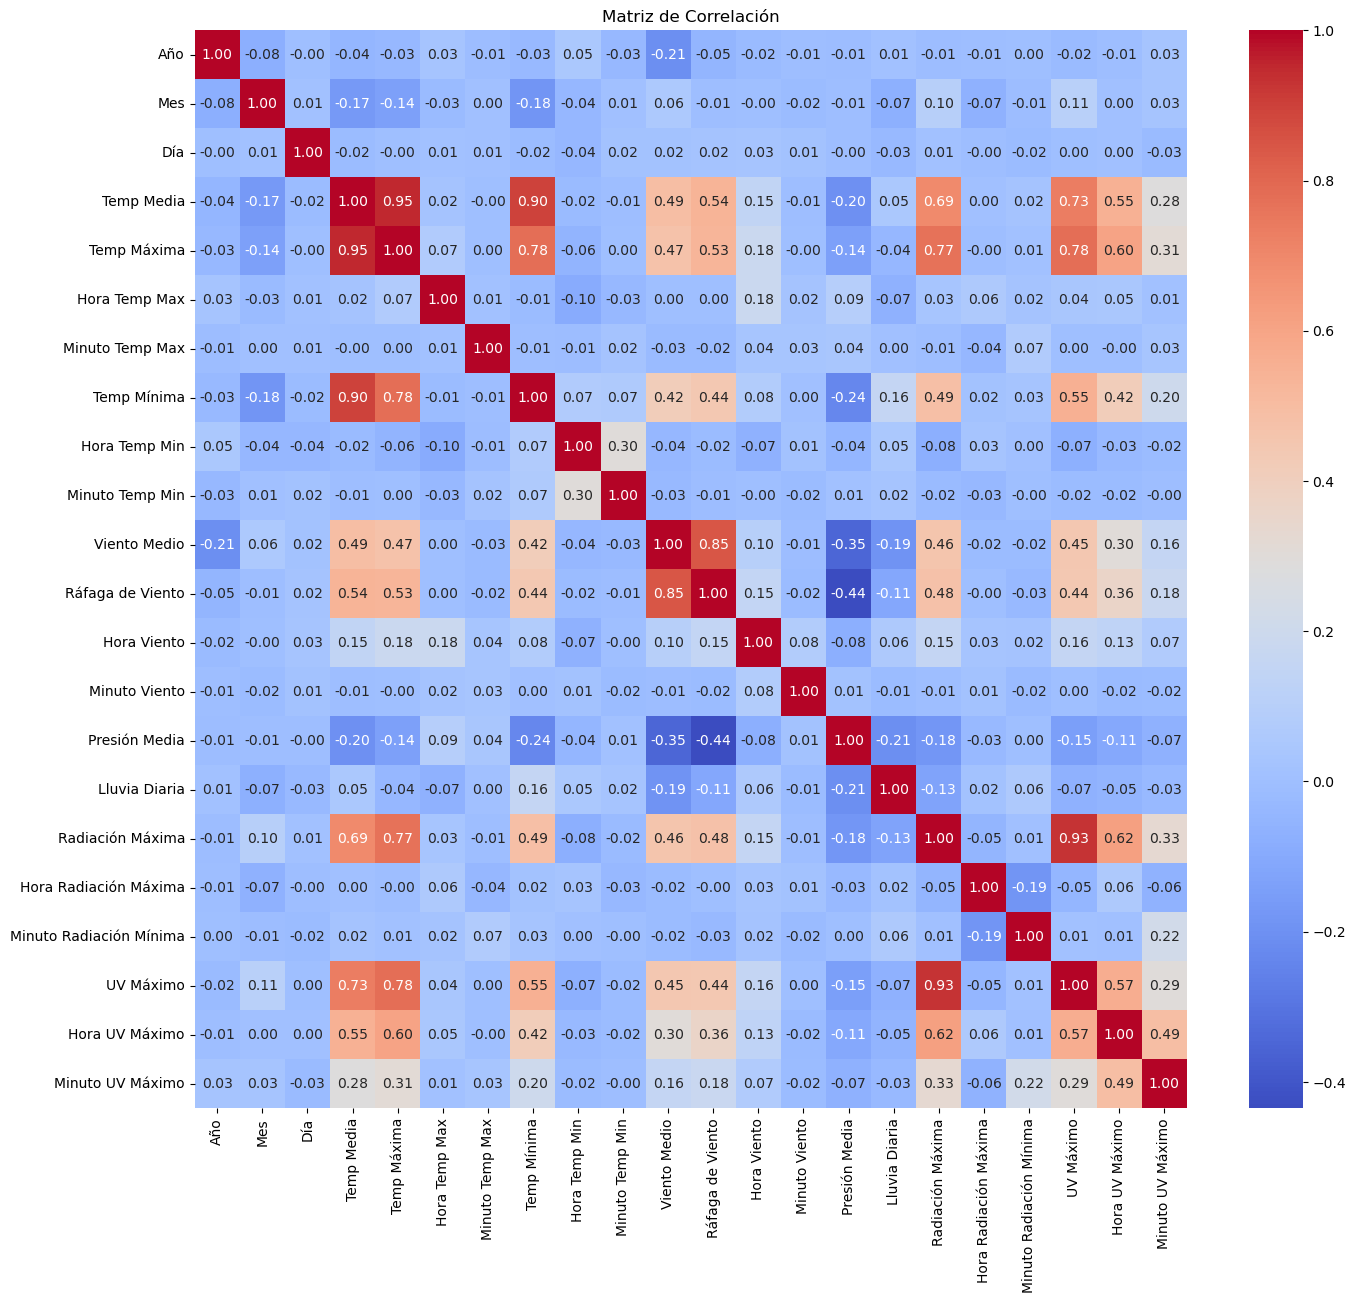

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = df[numeric_columns].corr()

# Ajustar el tamaño de la figura y el tamaño de la fuente de las anotaciones
plt.figure(figsize=(16, 14))  # Aumentar el tamaño de la figura

# Mostrar la matriz de correlación como un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

plt.title("Matriz de Correlación")
plt.show()


#### Histograma de Variables Numéricas
>Los histogramas nos permiten observar la distribución de cada variable numérica. En este caso, las variables del conjunto de datos se distribuyen de forma que podemos analizar su dispersión y simetría.

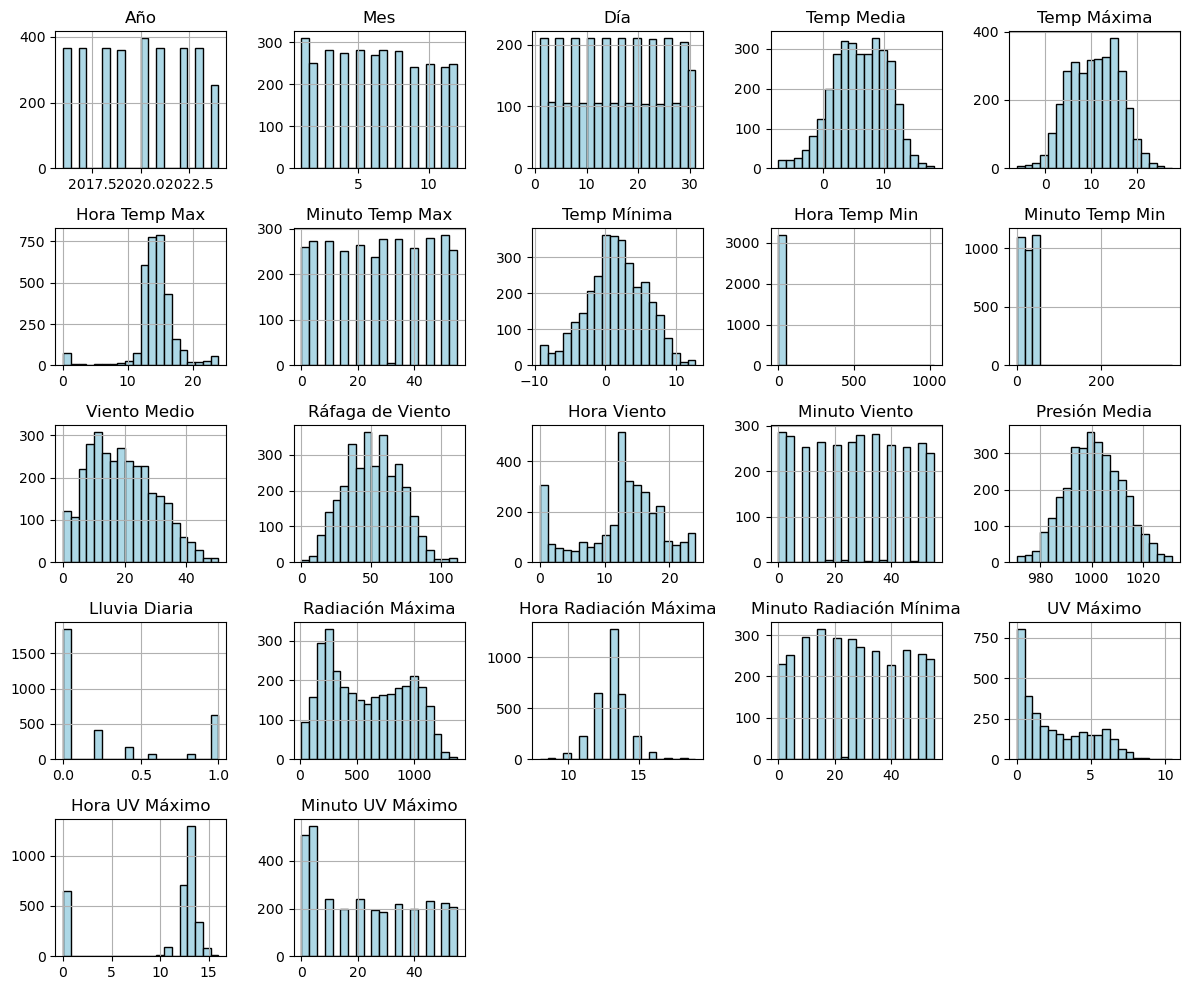

In [84]:
# Histograma para las variables numéricas
df[numeric_columns].hist(figsize=(12, 10), bins=20, color='lightblue', edgecolor='black')
plt.tight_layout()
plt.show()


#### Gráficos de Dispersión (Scatter Plots)
>Este gráfico nos permite analizar cómo varían la temperatura media y la temperatura máxima.

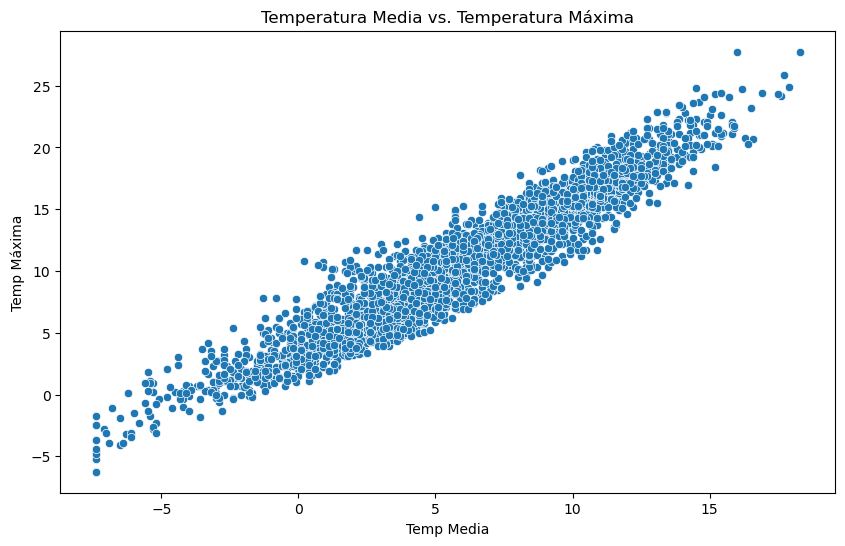

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp Media', y='Temp Máxima')
plt.title('Temperatura Media vs. Temperatura Máxima')
plt.show()



>En este gráfico podemos observar cómo se relaciona el viento medio con la temperatura máxima registrada.

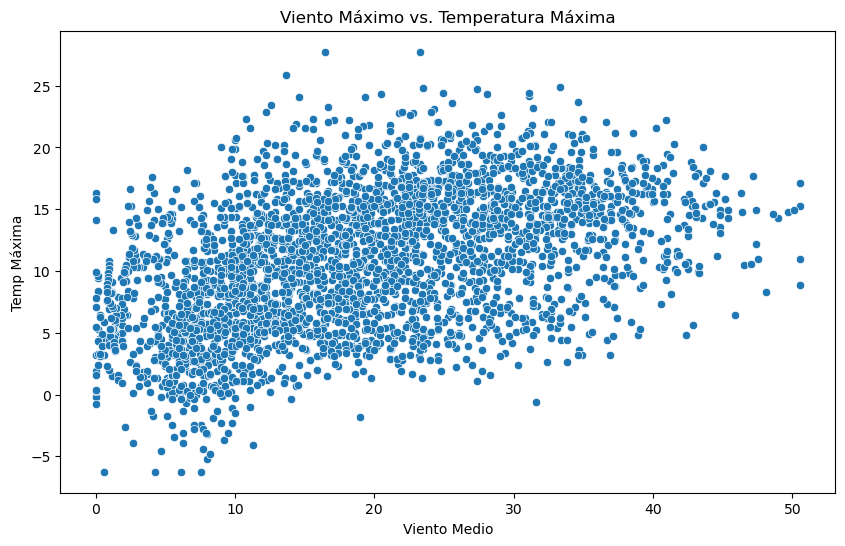

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='Temp Máxima', x='Viento Medio')
plt.title('Viento Máximo vs. Temperatura Máxima')
plt.show()


>Este gráfico muestra la relación entre la presión atmosférica media y la temperatura media.

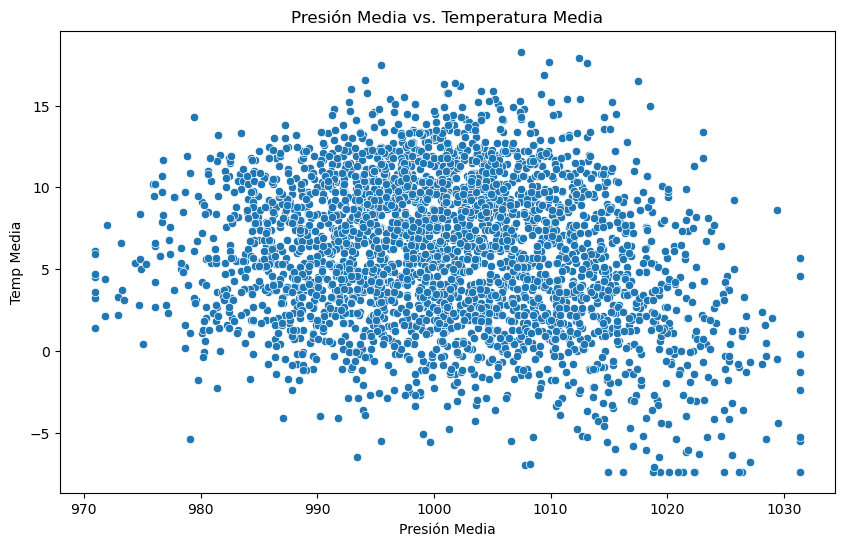

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Presión Media', y='Temp Media')
plt.title('Presión Media vs. Temperatura Media')
plt.show()


#### Boxplot de Viento Máximo por Mes
>El boxplot nos ayuda a identificar la dispersión y los valores atípicos (outliers) en la velocidad máxima del viento según el mes.

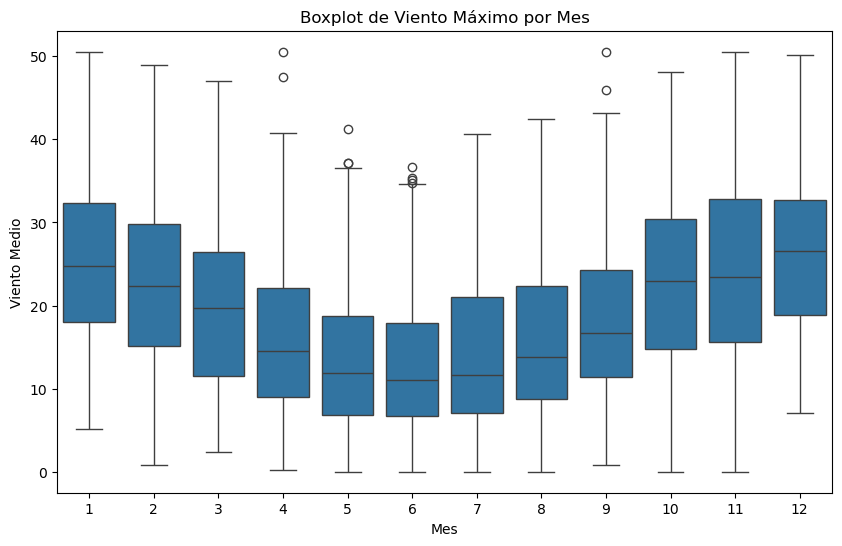

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Mes', y='Viento Medio')
plt.title('Boxplot de Viento Máximo por Mes')
plt.show()


### 11. Verificar Resultados Finales
>Verificamos los resultados después de la limpieza y preprocesamiento.

In [89]:
print(df.isnull().sum())

Año                        0
Mes                        0
Día                        0
Temp Media                 0
Temp Máxima                0
Hora Temp Max              0
Minuto Temp Max            0
Temp Mínima                0
Hora Temp Min              0
Minuto Temp Min            0
Viento Medio               0
Dirección Viento           0
Ráfaga de Viento           0
Dirección de Ráfaga        0
Hora Viento                0
Minuto Viento              0
Presión Media              0
Lluvia Diaria              0
Radiación Máxima           0
Hora Radiación Máxima      0
Minuto Radiación Mínima    0
UV Máximo                  0
Hora UV Máximo             0
Minuto UV Máximo           0
dtype: int64


In [90]:
# Verifica los resultados
df.describe()

,Año,Mes,Día,Temp Media,Temp Máxima,Hora Temp Max,Minuto Temp Max,Temp Mínima,Hora Temp Min,Minuto Temp Min,...,Hora Viento,Minuto Viento,Presión Media,Lluvia Diaria,Radiación Máxima,Hora Radiación Máxima,Minuto Radiación Mínima,UV Máximo,Hora UV Máximo,Minuto UV Máximo
count,3202.0,3202.0,3202.0,3202.000000,3202.000000,3202.0,3202.0,3202.000000,3202.0,3202.0,...,3202.0,3202.0,3202.000000,3202.000000,3202.000000,3202.0,3202.0,3202.000000,3202.0,3202.0
mean,2019.86321,6.320425,15.722049,6.042484,10.789831,14.276077,27.673954,1.536836,10.005309,28.006246,...,12.600874,27.040912,1001.116192,0.273382,590.130964,13.019675,27.022486,2.566412,10.229856,22.509369
std,2.505233,3.436724,8.808324,4.496166,5.461590,3.245546,17.275192,4.145756,21.048351,21.597551,...,6.087509,17.185607,10.901018,0.394999,342.191519,1.26863,16.806527,2.341201,5.231738,18.43055
min,2016.0,1.0,1.0,-7.400000,-6.250000,0.0,0.0,-9.250000,0.0,0.0,...,0.0,0.0,970.950000,0.000000,14.000000,8.0,0.0,0.000000,0.0,0.0
25%,2018.0,3.0,8.0,2.800000,6.500000,13.0,10.0,-1.000000,3.0,10.0,...,10.0,10.0,993.600000,0.000000,269.000000,12.0,15.0,0.500000,12.0,5.0
50%,2020.0,6.0,16.0,6.200000,11.000000,14.0,30.0,1.500000,6.0,30.0,...,14.0,25.0,1000.900000,0.000000,560.000000,13.0,25.0,1.800000,13.0,20.0
75%,2022.0,9.0,23.0,9.600000,15.000000,15.75,45.0,4.500000,21.0,45.0,...,16.0,40.0,1008.700000,0.400000,898.750000,14.0,40.0,4.500000,13.0,40.0
max,2024.0,12.0,31.0,18.300000,27.750000,24.0,55.0,12.750000,1028.0,369.0,...,24.0,55.0,1031.350000,1.000000,1376.000000,19.0,55.0,10.500000,16.0,55.0


In [59]:
# Exportar el dataframe limpio y procesado
df.to_csv('../data/processed/datos_limpios.csv', index=False)